<a href="https://colab.research.google.com/github/nehasiliveru/neha-rep-devops/blob/main/pyspark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Loaded DataFrame
+-------+------+------+----------+
|MovieID|UserID|Rating| Timestamp|
+-------+------+------+----------+
|      1|   101|     4|1672531200|
|      2|   101|     5|1672617600|
|      3|   101|     3|1672704000|
|      4|   101|     4|1672790400|
|      5|   101|     2|1672876800|
|      6|   101|     5|1672963200|
|      7|   101|     4|1673049600|
|      2|   102|     3|1673136000|
|      3|   102|     4|1673222400|
|      4|   102|     5|1673308800|
|      5|   102|     3|1673395200|
|      6|   102|     4|1673481600|
|      7|   102|     5|1673568000|
|      1|   103|     2|1673654400|
|      2|   103|     3|1673740800|
|      3|   103|     4|1673827200|
|      4|   103|     5|1673913600|
|      5|   103|     2|1674000000|
|      6|   103|     3|1674086400|
|      7|   103|     4|1674172800|
+-------+------+------+----------+

Step 2: Timestamp converted to Date
+-------+------+------+----------+----------+
|MovieID|UserID|Rating| Timestamp|      Date|
+-----

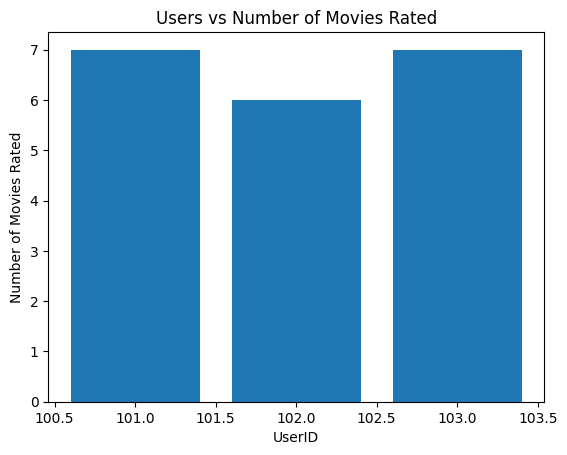

In [2]:
#Assignment: Analyse Movie Ratings
#0. Generate data with schema: MovieID, UserID, Rating and Timestamp
#1. Load the dataset into a PySpark DataFrame.
#2. Convert the Timestamp column to a human-readable date format
#3. Find the average rating for each movie.
#4. Identify users who have rated more than 5 movies.
#5. Determine the top 5 highest-rated movies.
#6. Visualise the users vs number of movies they rated
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, from_unixtime, avg, count
import matplotlib.pyplot as plt

spark = SparkSession.builder.appName("MovieRatingsAnalysis").getOrCreate()

#sample data
data = [
    (1, 101, 4, 1672531200), (2, 101, 5, 1672617600), (3, 101, 3, 1672704000),
    (4, 101, 4, 1672790400), (5, 101, 2, 1672876800), (6, 101, 5, 1672963200),
    (7, 101, 4, 1673049600), (2, 102, 3, 1673136000), (3, 102, 4, 1673222400),
    (4, 102, 5, 1673308800), (5, 102, 3, 1673395200), (6, 102, 4, 1673481600),
    (7, 102, 5, 1673568000), (1, 103, 2, 1673654400), (2, 103, 3, 1673740800),
    (3, 103, 4, 1673827200), (4, 103, 5, 1673913600), (5, 103, 2, 1674000000),
    (6, 103, 3, 1674086400), (7, 103, 4, 1674172800)
]

#DataFrame
columns = ["MovieID", "UserID", "Rating", "Timestamp"]
df = spark.createDataFrame(data, schema=columns)

#1.Load the dataset into a PySpark DataFrame
print("1: Loaded DataFrame")
df.show()

#2.Convert the Timestamp column to a human-readable date format
df = df.withColumn("Date", from_unixtime(col("Timestamp")).cast("date"))
print("2: Timestamp converted to Date")
df.show()

#3.Find the average rating for each movie
avg_ratings = df.groupBy("MovieID").agg(avg("Rating").alias("AverageRating"))
print("3: Average rating for each movie")
avg_ratings.show()

#4.Identify users who have rated more than 5 movies
user_rating_counts = df.groupBy("UserID").agg(count("MovieID").alias("NumRatings"))
active_users = user_rating_counts.filter(col("NumRatings") > 5)
print("4: Users who have rated more than 5 movies")
active_users.show()

#5.Determine the top 5 highest-rated movies
top_movies = avg_ratings.orderBy(col("AverageRating").desc()).limit(5)
print("5: Top 5 highest-rated movies")
top_movies.show()

#6.Visualize the users vs number of movies they rated
user_rating_counts_pd = user_rating_counts.toPandas()
plt.bar(user_rating_counts_pd["UserID"], user_rating_counts_pd["NumRatings"])
plt.xlabel("UserID")
plt.ylabel("Number of Movies Rated")
plt.title("Users vs Number of Movies Rated")
plt.show()

spark.stop()

1: Loaded DataFrame
+------+----------+----------+--------+----+
|TripID| StartTime|   EndTime|Distance|Fare|
+------+----------+----------+--------+----+
|     1|1672531200|1672534800|       5|10.5|
|     2|1672538400|1672542000|       8|15.0|
|     3|1672545600|1672549200|       3| 7.5|
|     4|1672552800|1672556400|      10|20.0|
|     5|1672560000|1672563600|       7|14.0|
|     6|1672567200|1672570800|      12|25.0|
|     7|1672574400|1672578000|       4| 8.0|
|     8|1672581600|1672585200|       6|12.0|
|     9|1672588800|1672592400|       9|18.0|
|    10|1672596000|1672599600|       2| 5.0|
+------+----------+----------+--------+----+

Trip duration for each trip
+------+----------+----------+--------+----+--------+
|TripID| StartTime|   EndTime|Distance|Fare|Duration|
+------+----------+----------+--------+----+--------+
|     1|1672531200|1672534800|       5|10.5|     1.0|
|     2|1672538400|1672542000|       8|15.0|     1.0|
|     3|1672545600|1672549200|       3| 7.5|     1.

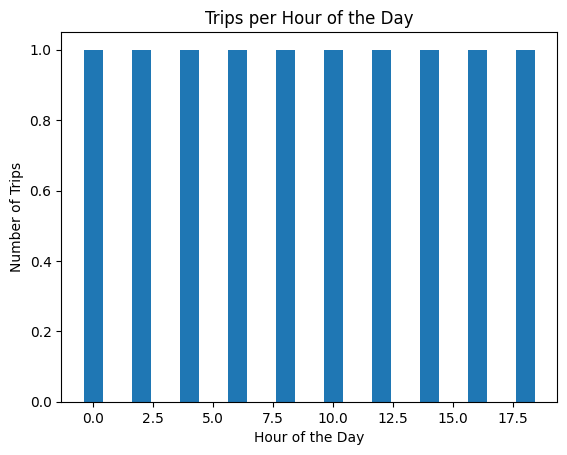

In [4]:
#Assignment: Analyse Trip data
#0. Generate data with schema: TripID, StartTime, EndTime, Distance and Fare
#1. Load the dataset into a PySpark DataFrame.
#2. Calculate the trip duration for each trip.
#3. Find the average fare per mile.
#4. Identify the top 3 longest trips (based on distance).
#5. Group trips by hour of the day and calculate the total number of trips per hour.
#6. Represent the hours of the day vs number of trips in that hour with a suitable chart.
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, from_unixtime, hour, unix_timestamp, avg, sum, desc
import matplotlib.pyplot as plt

spark = SparkSession.builder.appName("TripDataAnalysis").getOrCreate()

#Sample data
data = [
    (1, 1672531200, 1672534800, 5, 10.5),
    (2, 1672538400, 1672542000, 8, 15.0),
    (3, 1672545600, 1672549200, 3, 7.5),
    (4, 1672552800, 1672556400, 10, 20.0),
    (5, 1672560000, 1672563600, 7, 14.0),
    (6, 1672567200, 1672570800, 12, 25.0),
    (7, 1672574400, 1672578000, 4, 8.0),
    (8, 1672581600, 1672585200, 6, 12.0),
    (9, 1672588800, 1672592400, 9, 18.0),
    (10, 1672596000, 1672599600, 2, 5.0)
]

# Create DataFrame
columns = ["TripID", "StartTime", "EndTime", "Distance", "Fare"]
df = spark.createDataFrame(data, schema=columns)

# Register DataFrame as a SQL table
df.createOrReplaceTempView("trips")

# 1. Load the dataset into a PySpark DataFrame
print("1: Loaded DataFrame")
df.show()

# 2.Calculate the trip duration for each trip
print("2: Trip duration for each trip")
spark.sql("""
    SELECT *, (EndTime - StartTime) / 3600 AS Duration
    FROM trips
""").show()

# 3. Find the average fare per mile
print("3: The average fare per mile")
spark.sql("""
    SELECT AVG(Fare / Distance) AS AvgFarePerMile
    FROM trips
""").show()

# 4. Identify the top 3 longest trips (based on distance)
print("4: The top 3 longest trips")
spark.sql("""
    SELECT *
    FROM trips
    ORDER BY Distance DESC
    LIMIT 3
""").show()

# 5. Group trips by hour of the day and calculate the total number of trips per hour
print("5: Group trips by hour of the day and the total number of trips per hour")
spark.sql("""
    SELECT HOUR(FROM_UNIXTIME(StartTime)) AS StartHour, COUNT(TripID) AS TotalTrips
    FROM trips
    GROUP BY StartHour
    ORDER BY StartHour
""").show()

# 6. Represent the hours of the day vs number of trips in that hour with a suitable chart
trips_per_hour_sql = spark.sql("""
    SELECT HOUR(FROM_UNIXTIME(StartTime)) AS StartHour, COUNT(TripID) AS TotalTrips
    FROM trips
    GROUP BY StartHour
    ORDER BY StartHour
""").toPandas()

plt.bar(trips_per_hour_sql["StartHour"], trips_per_hour_sql["TotalTrips"])
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.title("Trips per Hour of the Day")
plt.show()

In [10]:
#Assignment: Log Analysis
#0. Generate a log file with the following kind of data:
#    2024-12-18 10:15:32 INFO User logged in
#   2024-12-18 10:16:02 ERROR Page not found
#    2024-12-18 10:17:20 INFO Data uploaded successfully
#1. Load the log file into a PySpark DataFrame (use spark.read.text).
#2. Extract the timestamp, log level (INFO, ERROR, etc.), and message.
#3. Count the number of occurrences of each log level.
#4. Filter and display only the ERROR logs.
#5. Group logs by hour and count the number of logs in each hour.

from pyspark.sql import SparkSession
from pyspark.sql.functions import split, col, hour, to_timestamp, concat_ws

spark = SparkSession.builder.appName("LogAnalysis").getOrCreate()

# 1. Load the log file into a PySpark DataFrame
log_df = spark.read.text("/content/drive/MyDrive/logfile.txt")
print("1: Loaded log file into DataFrame")
log_df.show(truncate=False)

# 2. Extract the timestamp, log level, and message
split_cols = split(log_df["value"], " ", 4)
log_df = log_df.withColumn("Timestamp", to_timestamp(concat_ws(" ", split_cols.getItem(0), split_cols.getItem(1)), "yyyy-MM-dd HH:mm:ss")) \
               .withColumn("LogLevel", split_cols.getItem(2)) \
               .withColumn("Message", split_cols.getItem(3))

log_df = log_df.drop("value")  # Remove the original column
print("2: Extracted timestamp, log level, and message")
log_df.show(truncate=False)

# Register the transformed DataFrame as a SQL table
log_df.createOrReplaceTempView("logs")

# 3. Count the number of occurrences of each log level using SQL
print("3: Count of occurrences of each log level using SQL")
spark.sql("""
    SELECT LogLevel, COUNT(*) AS Count
    FROM logs
    GROUP BY LogLevel
""").show()

# 4. Filter and display only the ERROR logs using SQL
print("4: Filtered ERROR logs using SQL")
spark.sql("""
    SELECT *
    FROM logs
    WHERE LogLevel = 'ERROR'
""").show(truncate=False)

# 5. Group logs by hour and count the number of logs in each hour using SQL
print("5: Logs grouped by hour using SQL")
spark.sql("""
    SELECT HOUR(Timestamp) AS Hour, COUNT(*) AS LogCount
    FROM logs
    GROUP BY Hour
    ORDER BY Hour
""").show()

spark.stop()


Step 1: Loaded log file into DataFrame
+----------------------------------------------------+
|value                                               |
+----------------------------------------------------+
|2024-12-18 10:15:32 INFO User logged in             |
|2024-12-18 10:16:02 ERROR Page not found            |
|2024-12-18 10:17:20 INFO Data uploaded successfully |
|2024-12-18 10:18:45 WARNING Disk space low          |
|2024-12-18 10:19:10 INFO User logged out            |
|2024-12-18 11:20:30 ERROR Database connection failed|
|2024-12-18 11:21:15 INFO Data processed             |
|2024-12-18 11:22:40 WARNING High memory usage       |
|2024-12-18 11:23:55 INFO Task completed             |
|2024-12-18 11:24:10 ERROR File not found            |
+----------------------------------------------------+

Step 2: Extracted timestamp, log level, and message
+-------------------+--------+--------------------------+
|Timestamp          |LogLevel|Message                   |
+-------------------+-